In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

In [2]:
def get_data2(filename):    
    data = pd.read_csv(filename) #, names=["Interval","kWh"])
    return data

In [3]:
conso_file = r"\\192.168.0.175\pihome\Documents\conso2.csv"
conso_data = get_data2(conso_file)
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177260 entries, 0 to 1177259
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Interval  1177260 non-null  int64  
 1   kWh       1177260 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 18.0 MB


In [4]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1177255    0.22
1177256    0.22
1177257    0.22
1177258    0.22
1177259    0.20
Name: kWh, Length: 1177260, dtype: float64

In [5]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1177255    0.22
1177256    0.22
1177257    0.22
1177258    0.22
1177259    0.20
Name: kWh, Length: 1177260, dtype: float64

In [6]:
l=len(conso_data)-1
l

1177259

In [7]:
conso_data['sec']=conso_data['Interval']/1000


In [8]:
conso_data['Wh']=3600000/conso_data['Interval']


In [9]:
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

In [10]:
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177260 entries, 0 to 1177259
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Interval   1177260 non-null  int64  
 1   kWh        1177260 non-null  float64
 2   sec        1177260 non-null  float64
 3   Wh         1177260 non-null  float64
 4   cumul(ms)  1177260 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 44.9 MB


In [11]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms)
1177255,16053,0.22,16.053,224.257148,27655821500
1177256,16411,0.22,16.411,219.365060,27655837911
1177257,16411,0.22,16.411,219.365060,27655854322
1177258,16219,0.22,16.219,221.961897,27655870541
1177259,18290,0.20,18.290,196.828868,27655888831


In [12]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)  # convert to microseconds
cumtime

27655888831000

In [13]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début

datetime.datetime(2023, 8, 21, 18, 54, 1, 632542)

In [14]:
conso_data['cumul(ms)'][conso_data['cumul(ms)'].isna()==True]

Series([], Name: cumul(ms), dtype: int64)

In [15]:
conso_data.iloc[0]


Interval     21934.00000
kWh              0.16000
sec             21.93400
Wh             164.12875
cumul(ms)    21934.00000
Name: 0, dtype: float64

In [16]:
conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]


In [17]:
conso_data['dates']

0         2023-08-21 18:54:23.566542
1         2023-08-21 18:54:45.424542
2         2023-08-21 18:55:07.425542
3         2023-08-21 18:55:29.353542
4         2023-08-21 18:55:51.244542
                     ...            
1177255   2024-07-06 21:04:23.132542
1177256   2024-07-06 21:04:39.543542
1177257   2024-07-06 21:04:55.954542
1177258   2024-07-06 21:05:12.173542
1177259   2024-07-06 21:05:30.463542
Name: dates, Length: 1177260, dtype: datetime64[ns]

In [18]:
conso_data['days']= [d.strftime('%d/%m/%y') for d in conso_data['dates']]    
#[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 18:54:23.566542,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 18:54:45.424542,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 18:55:07.425542,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 18:55:29.353542,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 18:55:51.244542,21/08/23
...,...,...,...,...,...,...,...
1177255,16053,0.22,16.053,224.257148,27655821500,2024-07-06 21:04:23.132542,06/07/24
1177256,16411,0.22,16.411,219.365060,27655837911,2024-07-06 21:04:39.543542,06/07/24
1177257,16411,0.22,16.411,219.365060,27655854322,2024-07-06 21:04:55.954542,06/07/24
1177258,16219,0.22,16.219,221.961897,27655870541,2024-07-06 21:05:12.173542,06/07/24


In [19]:
# tranche journalière
now = datetime.now()
month = now.month
year = now.year
date = now.day
day = now.strftime('%d/%m/%y')    #str(now.month)+'-'+str(now.day)
day, date, month, year


('06/07/24', 6, 7, 2024)

In [20]:
here = now.strftime('%H:%M:%S')
here

'21:05:53'

In [21]:
conso_day = conso_data[conso_data['days']==day]
# save to file
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [22]:
conso_day.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1847 entries, 1175413 to 1177259
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1847 non-null   int64         
 1   kWh        1847 non-null   float64       
 2   sec        1847 non-null   float64       
 3   Wh         1847 non-null   float64       
 4   cumul(ms)  1847 non-null   int64         
 5   dates      1847 non-null   datetime64[ns]
 6   days       1847 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 115.4+ KB


In [23]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
#grouped
# count elements in each group => conso in watts => convert to kW
df_grp = grouped.count()/1000


In [24]:
data = list(df_grp['kWh'])
print(data)


[0.857, 3.7, 4.23, 3.686, 4.194, 4.622, 3.506, 3.402, 3.529, 3.685, 3.803, 3.755, 4.257, 3.829, 3.441, 3.639, 3.325, 3.43, 4.252, 4.0, 4.052, 3.918, 3.437, 4.472, 3.717, 3.768, 4.418, 4.668, 3.769, 3.216, 3.178, 4.021, 3.652, 3.18, 3.796, 4.172, 3.738, 3.563, 4.793, 4.177, 4.546, 3.772, 3.396, 4.31, 3.876, 3.874, 3.435, 4.076, 3.652, 3.401, 4.124, 3.388, 3.892, 3.834, 3.644, 3.752, 4.241, 3.294, 3.874, 2.967, 2.056, 2.048, 2.46, 4.09, 3.734, 4.325, 3.629, 3.901, 3.752, 3.938, 3.96, 4.126, 3.632, 3.167, 3.8, 3.551, 3.59, 3.7, 3.689, 3.235, 3.91, 3.26, 3.749, 3.594, 4.09, 3.607, 3.339, 3.825, 4.061, 4.385, 4.081, 3.999, 4.222, 3.75, 3.924, 3.87, 3.912, 3.751, 4.04, 4.341, 3.885, 3.505, 3.683, 3.674, 3.339, 3.851, 3.99, 4.108, 3.475, 4.172, 3.608, 4.104, 4.515, 3.684, 3.423, 3.578, 4.183, 3.673, 4.08, 3.981, 3.745, 3.591, 5.133, 3.699, 3.76, 4.304, 4.091, 4.753, 4.393, 3.964, 3.791, 4.362, 4.664, 4.215, 4.782, 4.338, 3.689, 4.214, 3.69, 3.627, 3.523, 3.96, 3.657, 3.787, 3.586, 3.492, 3.92

In [25]:
# save to file
import pickle
path = r'kwh_mean.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

In [26]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
def show(day,pltcolor='darkcyan',bgcolor="ivory"):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
    #=[x.hour for x in conso_day['dates']]
    df= conso_day.set_index('heure')
    here = now.strftime('%H:%M:%S')
    conso_jour=len(df['kWh'])
    here, len(df)/1000, conso_jour

    # consommation d'une journée entière à partir de minuit
    # Set background color of the outer 
    # area of the plt
    #plt.figure(facecolor=fgcolor)
    fig, ax = plt.subplots(facecolor=pltcolor)
    
    major_ticks=300;minor_ticks=100
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
    # the size of A4 paper
    fig.set_size_inches(10, 5)
    
    # set bg color
    ax.set_facecolor(bgcolor)
    plt.plot(df['kWh'])
    #plt.plot(conso_day['heure'],conso_day['kWh'])
    plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
    plt.grid()
    plt.xticks(rotation=30);


In [27]:
def conso_byhour(day):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))

    conso_hours = conso_day.copy()
    conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
    conso_hours#.info()
    # group by hour
    groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
    groupedbyhour.count()
    len(groupedbyhour)
    x = np.arange(1,len(groupedbyhour)+1)

    #groupedbyhour.count().plot(grid=True,xticks=x)
    plt.figure(figsize=(12, 8),facecolor='darkcyan')
    values = groupedbyhour.count().kWh
    #ax = plt.bar(x,groupedbyhour.count().kWh)
    ax = values.plot(kind="bar",color='green',width=.8)
    ax.set_facecolor('antiquewhite')
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) - {day}')
    plt.xlim(-1,len(x)+1)
    plt.xticks(rotation=30);
    
    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in values]
    
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",
            fontfamily='calibri', fontsize=16, fontweight='bold', color='blue'
        )
    
    

In [28]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean

kWh    0.308772
dtype: float64

In [29]:
mean=(grouped.count()/1000).mean()
mean

kWh    3.667477
dtype: float64

In [30]:
last=df_grp.iloc[-1]['kWh']
last

1.847

In [31]:
conso_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1847 entries, 1175413 to 1177259
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1847 non-null   int64         
 1   kWh        1847 non-null   float64       
 2   sec        1847 non-null   float64       
 3   Wh         1847 non-null   float64       
 4   cumul(ms)  1847 non-null   int64         
 5   dates      1847 non-null   datetime64[ns]
 6   days       1847 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 115.4+ KB


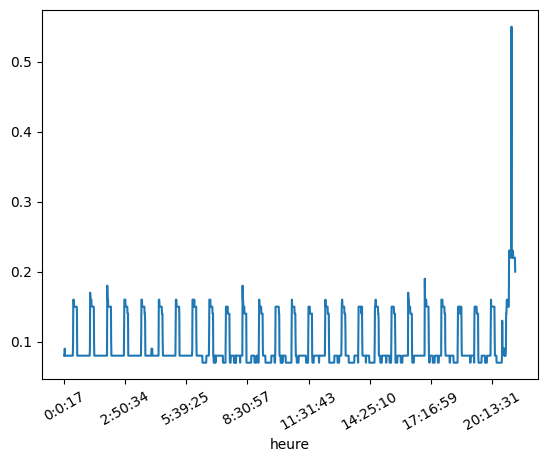

In [32]:
conso_day=conso_data[conso_data['days']==day].copy()  # no more error
conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
df= conso_day.set_index('heure')
df.tail(2000)['kWh'].plot()
plt.xticks(rotation=30);

In [33]:
conso_day['heure']


1175413     0:0:17
1175414      0:1:2
1175415     0:1:42
1175416     0:2:25
1175417      0:3:9
            ...   
1177255    21:4:23
1177256    21:4:39
1177257    21:4:55
1177258    21:5:12
1177259    21:5:30
Name: heure, Length: 1847, dtype: object

In [34]:
df_byhour = df[['days','kWh']].groupby('heure', sort=False)
list(df_byhour)

[('0:0:17',
              days   kWh
  heure                 
  0:0:17  06/07/24  0.08),
 ('0:1:2',
             days   kWh
  heure                
  0:1:2  06/07/24  0.08),
 ('0:1:42',
              days   kWh
  heure                 
  0:1:42  06/07/24  0.09),
 ('0:2:25',
              days   kWh
  heure                 
  0:2:25  06/07/24  0.08),
 ('0:3:9',
             days   kWh
  heure                
  0:3:9  06/07/24  0.08),
 ('0:3:54',
              days   kWh
  heure                 
  0:3:54  06/07/24  0.08),
 ('0:4:38',
              days   kWh
  heure                 
  0:4:38  06/07/24  0.08),
 ('0:5:23',
              days   kWh
  heure                 
  0:5:23  06/07/24  0.08),
 ('0:6:7',
             days   kWh
  heure                
  0:6:7  06/07/24  0.08),
 ('0:6:52',
              days   kWh
  heure                 
  0:6:52  06/07/24  0.08),
 ('0:7:36',
              days   kWh
  heure                 
  0:7:36  06/07/24  0.08),
 ('0:8:21',
              days   

In [35]:
kwh_byhour = list(df_byhour['kWh'])
kwh_byhour

[('0:0:17',
  heure
  0:0:17    0.08
  Name: kWh, dtype: float64),
 ('0:1:2',
  heure
  0:1:2    0.08
  Name: kWh, dtype: float64),
 ('0:1:42',
  heure
  0:1:42    0.09
  Name: kWh, dtype: float64),
 ('0:2:25',
  heure
  0:2:25    0.08
  Name: kWh, dtype: float64),
 ('0:3:9',
  heure
  0:3:9    0.08
  Name: kWh, dtype: float64),
 ('0:3:54',
  heure
  0:3:54    0.08
  Name: kWh, dtype: float64),
 ('0:4:38',
  heure
  0:4:38    0.08
  Name: kWh, dtype: float64),
 ('0:5:23',
  heure
  0:5:23    0.08
  Name: kWh, dtype: float64),
 ('0:6:7',
  heure
  0:6:7    0.08
  Name: kWh, dtype: float64),
 ('0:6:52',
  heure
  0:6:52    0.08
  Name: kWh, dtype: float64),
 ('0:7:36',
  heure
  0:7:36    0.08
  Name: kWh, dtype: float64),
 ('0:8:21',
  heure
  0:8:21    0.08
  Name: kWh, dtype: float64),
 ('0:9:5',
  heure
  0:9:5    0.08
  Name: kWh, dtype: float64),
 ('0:9:50',
  heure
  0:9:50    0.08
  Name: kWh, dtype: float64),
 ('0:10:34',
  heure
  0:10:34    0.08
  Name: kWh, dtype: float64),
 

In [36]:
df

,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:17,46415,0.08,46.415,77.561133,27579975438,2024-07-06 00:00:17.070542,06/07/24
0:1:2,45066,0.08,45.066,79.882839,27580020504,2024-07-06 00:01:02.136542,06/07/24
0:1:42,40508,0.09,40.508,88.871334,27580061012,2024-07-06 00:01:42.644542,06/07/24
0:2:25,42543,0.08,42.543,84.620267,27580103555,2024-07-06 00:02:25.187542,06/07/24
0:3:9,44478,0.08,44.478,80.938891,27580148033,2024-07-06 00:03:09.665542,06/07/24
...,...,...,...,...,...,...,...
21:4:23,16053,0.22,16.053,224.257148,27655821500,2024-07-06 21:04:23.132542,06/07/24
21:4:39,16411,0.22,16.411,219.365060,27655837911,2024-07-06 21:04:39.543542,06/07/24
21:4:55,16411,0.22,16.411,219.365060,27655854322,2024-07-06 21:04:55.954542,06/07/24


In [37]:
# premier kWh
if len(df)>1000:
    df.iloc[1000]['dates']

In [38]:
df.iloc[0].dates

Timestamp('2024-07-06 00:00:17.070542')

In [39]:
df.dates.dt.time

heure
0:0:17     00:00:17.070542
0:1:2      00:01:02.136542
0:1:42     00:01:42.644542
0:2:25     00:02:25.187542
0:3:9      00:03:09.665542
                ...       
21:4:23    21:04:23.132542
21:4:39    21:04:39.543542
21:4:55    21:04:55.954542
21:5:12    21:05:12.173542
21:5:30    21:05:30.463542
Name: dates, Length: 1847, dtype: object

In [40]:
def period(p=1):
    if p==1:
        start = df.iloc[0].dates
    else:
        start = df.iloc[(p-1)*1000-1].dates
    if len(df)>p*1000:
        end = df.iloc[p*1000-1].dates
        conso = p*1000
    else:
        end = df.iloc[len(df)-1].dates
        conso = len(df) - (p-1)*1000
    period = end - start  # type timedelta
    hours = int(period / dt.timedelta(hours=1))
    mins = int(period / dt.timedelta(minutes=1)) - hours*60
    secs = int(period / dt.timedelta(seconds=1)) - hours*3600 - mins*60

    #df.iloc[1001:2000]['dates']#.tail(1)
    #print(period)
    print(f'{start}\t{end}\t{hours}h {mins}m {secs}s \t{conso}')


In [41]:
tranches = len(df)//1000
tranches+1

2

In [42]:
# temps de conso par tranches de 1kwh
for p in range(1,tranches+2):  # les 5 tranches de kWh consommés
    if len(df)>(p-1)*1000:
        period(p)

2024-07-06 00:00:17.070542	2024-07-06 11:31:19.402542	11h 31m 2s 	1000
2024-07-06 11:31:19.402542	2024-07-06 21:05:30.463542	9h 34m 11s 	847


In [43]:
# conso temps réel
here = now.strftime('%H:%M:%S')
conso_jour=len(df['kWh'])
here, len(df)/1000, conso_jour

('21:05:53', 1.847, 1847)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1847 entries, 0:0:17 to 21:5:30
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1847 non-null   int64         
 1   kWh        1847 non-null   float64       
 2   sec        1847 non-null   float64       
 3   Wh         1847 non-null   float64       
 4   cumul(ms)  1847 non-null   int64         
 5   dates      1847 non-null   datetime64[ns]
 6   days       1847 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 180.0+ KB


In [45]:
def from_csv(csv_file):    
    df = pd.read_csv(csv_file)
    return df
    
def to_csv(csv_file, df):
    df.to_csv(csv_file, index=False)

In [46]:
df_grp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 321 entries, 21/08/23 to 06/07/24
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kWh     321 non-null    float64
dtypes: float64(1)
memory usage: 5.0+ KB


In [47]:
df_grp.to_csv('df_grp.csv')
df.to_csv('df.csv')

In [48]:
df_grp.tail(7)

,kWh
days,
30/06/24,2.090
01/07/24,2.082
02/07/24,2.088
03/07/24,2.077
04/07/24,2.076
05/07/24,2.082
06/07/24,1.847


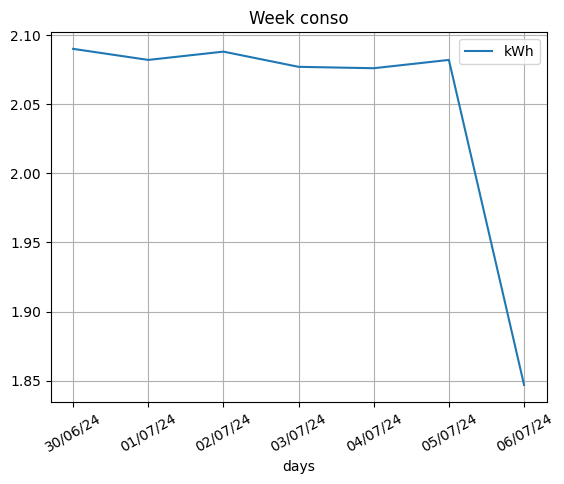

In [49]:
# last week conso
df_grp.tail(7).plot(grid=True)
plt.title('Week conso')
plt.xticks(rotation=30);

In [50]:
current=plt.get_current_fig_manager()
current.set_window_title('Conso by day')
#help(current.canvas)
#,facecolor='darkcyan')

<Figure size 640x480 with 0 Axes>

In [51]:
#plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
#plt.style.use('dark_background')


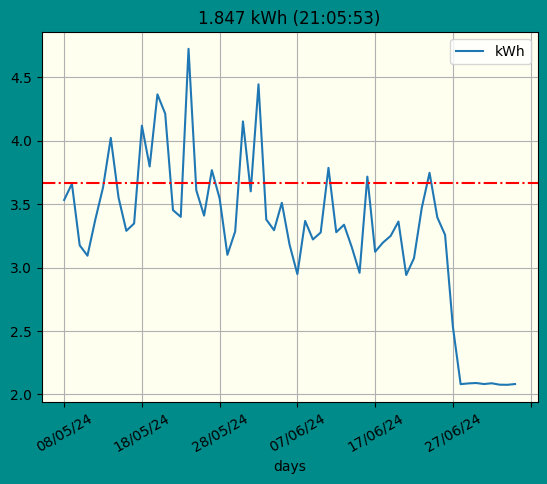

In [52]:
# pandas plot the day consos in the group
fig, ax = plt.subplots(facecolor='darkcyan')  # as argument
#or fig.patch.set_facecolor('darkcyan') # This changes the grey to white
ax.set_facecolor("ivory")

# 2 last months
df_grp.iloc[-60:-1].plot(grid=True,ax=ax, y=["kWh"])   #df.plot(x="Name", y=["Age", "Height(in cm)"], kind="bar", ax=ax)
plt.title(str(last)+' kWh ('+str(here)+')')
plt.axhline(y=np.nanmean(df_grp),c='red', ls='-.')
plt.xticks(rotation=30);  # https://ipython.readthedocs.io/en/stable/interactive/tips.html


In [53]:
df_grp.mean()

kWh    3.667477
dtype: float64

In [70]:
#df_grp.head()
df_grp.tail(14)

,kWh
days,
23/06/24,3.469
24/06/24,3.746
25/06/24,3.395
26/06/24,3.257
27/06/24,2.535
28/06/24,2.081
29/06/24,2.087
30/06/24,2.090
01/07/24,2.082


In [55]:
# max min during last month
#print(df_grp.iloc[-31:-1])
df_grp.iloc[-31:-1].describe()


,kWh
count,30.000000
mean,2.941167
std,0.579455
min,2.076000
25%,2.201250
50%,3.169500
75%,3.322250
max,3.785000


In [56]:
month = df_grp.iloc[-31:-1]['kWh']
print(month.idxmax(), max(month))
print(month.idxmin(), min(month))

11/06/24 3.785
04/07/24 2.076


In [57]:
day

'06/07/24'

In [58]:
conso_day

,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
1175413,46415,0.08,46.415,77.561133,27579975438,2024-07-06 00:00:17.070542,06/07/24,0:0:17
1175414,45066,0.08,45.066,79.882839,27580020504,2024-07-06 00:01:02.136542,06/07/24,0:1:2
1175415,40508,0.09,40.508,88.871334,27580061012,2024-07-06 00:01:42.644542,06/07/24,0:1:42
1175416,42543,0.08,42.543,84.620267,27580103555,2024-07-06 00:02:25.187542,06/07/24,0:2:25
1175417,44478,0.08,44.478,80.938891,27580148033,2024-07-06 00:03:09.665542,06/07/24,0:3:9
...,...,...,...,...,...,...,...,...
1177255,16053,0.22,16.053,224.257148,27655821500,2024-07-06 21:04:23.132542,06/07/24,21:4:23
1177256,16411,0.22,16.411,219.365060,27655837911,2024-07-06 21:04:39.543542,06/07/24,21:4:39
1177257,16411,0.22,16.411,219.365060,27655854322,2024-07-06 21:04:55.954542,06/07/24,21:4:55
1177258,16219,0.22,16.219,221.961897,27655870541,2024-07-06 21:05:12.173542,06/07/24,21:5:12


In [59]:
#add hours column
conso_hours = conso_day.copy()
conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
conso_hours.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1847 entries, 1175413 to 1177259
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1847 non-null   int64         
 1   kWh        1847 non-null   float64       
 2   sec        1847 non-null   float64       
 3   Wh         1847 non-null   float64       
 4   cumul(ms)  1847 non-null   int64         
 5   dates      1847 non-null   datetime64[ns]
 6   days       1847 non-null   object        
 7   heure      1847 non-null   object        
 8   hours      1847 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 144.3+ KB


In [60]:
# group conso of the day by hour
groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
list(groupedbyhour)

[('00',
          hours   kWh
  1175413    00  0.08
  1175414    00  0.08
  1175415    00  0.09
  1175416    00  0.08
  1175417    00  0.08
  ...       ...   ...
  1175495    00  0.08
  1175496    00  0.08
  1175497    00  0.08
  1175498    00  0.08
  1175499    00  0.08
  
  [87 rows x 2 columns]),
 ('01',
          hours   kWh
  1175500    01  0.08
  1175501    01  0.08
  1175502    01  0.08
  1175503    01  0.08
  1175504    01  0.08
  ...       ...   ...
  1175582    01  0.08
  1175583    01  0.08
  1175584    01  0.08
  1175585    01  0.08
  1175586    01  0.08
  
  [87 rows x 2 columns]),
 ('02',
          hours   kWh
  1175587    02  0.08
  1175588    02  0.08
  1175589    02  0.18
  1175590    02  0.16
  1175591    02  0.16
  ...       ...   ...
  1175676    02  0.08
  1175677    02  0.08
  1175678    02  0.08
  1175679    02  0.08
  1175680    02  0.08
  
  [94 rows x 2 columns]),
 ('03',
          hours   kWh
  1175681    03  0.08
  1175682    03  0.08
  1175683    03  0.08
 

In [61]:
groupedbyhour.count()

,kWh
hours,
00,87
01,87
02,94
03,87
04,87
05,88
06,90
07,83
08,83


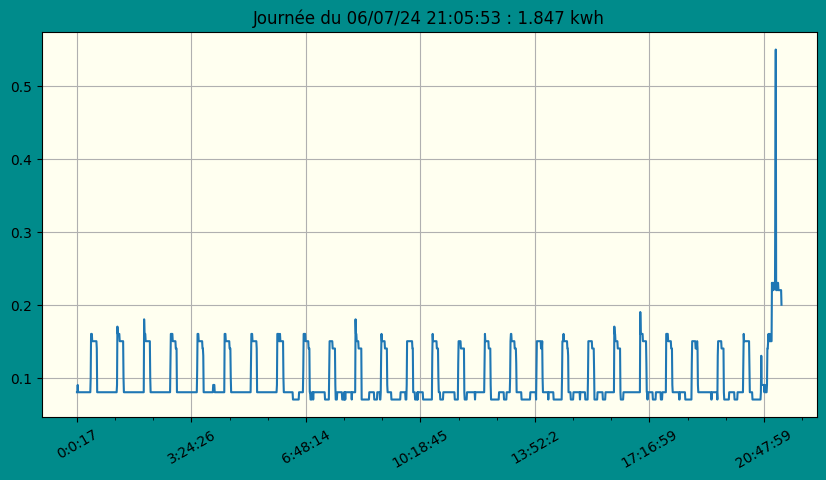

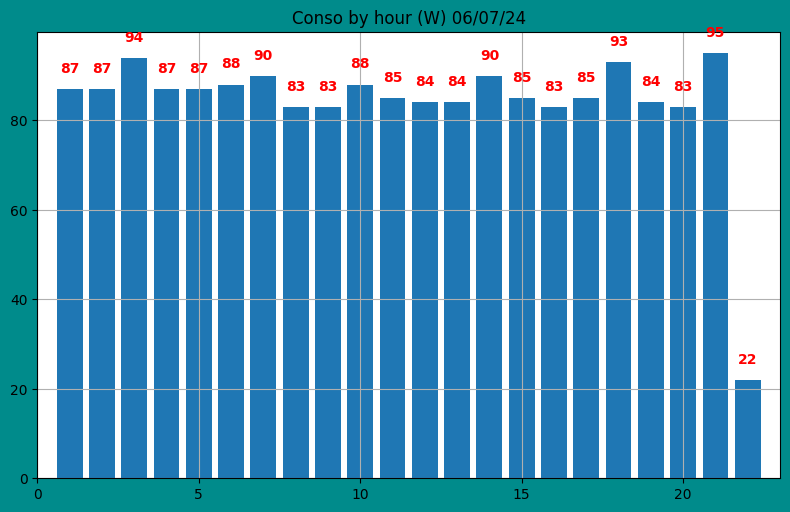

In [62]:
show(day,bgcolor='ivory')
data = groupedbyhour.count().kWh
#len(groupedbyhour)
x = np.arange(1,len(groupedbyhour)+1)
ymax = max(data)+5
#groupedbyhour.count().plot(grid=True,xticks=x)
fig, ax = plt.subplots(figsize=(8, 5), facecolor='darkcyan')

plt.bar(x,data)
plt.grid()
plt.tight_layout()
plt.title(f'Conso by hour (W) {day}')
plt.xlim(0,len(x)+1)
#plt.xticks(rotation=30);
#plt.ylim(0,ymax)

rects = ax.patches

# Make some labels.
labels = [f"{i}" for i in data]
fontfamily = {'calibri', 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom",
        fontfamily=fontfamily, fontsize=10, fontweight='bold', color='red'
    )


In [63]:
import os
os.listdir(path='.')

['.git',
 '.ipynb_checkpoints',
 '5_days_meteo.ipynb',
 '8days.csv',
 '8days.pkl',
 '8days_dump.json',
 '8days_to_json.json',
 'advanced_expression.ipynb',
 'alphabeta_tree.ipynb',
 'amlich.ipynb',
 'amlich5.ipynb',
 'amlich_data.py',
 'amlich_functions.py',
 'amlich_lib.py',
 'AntPath.ipynb',
 'Apple.csv',
 'astronomie_def.ipynb',
 'atom_electronic_configuration.ipynb',
 'bar_label.ipynb',
 'bell_curve.ipynb',
 'bitcoin_api.ipynb',
 'bitmap_convert.ipynb',
 'bitmap_structure.ipynb',
 'CAC40.csv',
 'chess_board.ipynb',
 'coindesk_api_client.ipynb',
 'collections.ipynb',
 'colormaps.ipynb',
 'conso.txt',
 'conso_by_hour.ipynb',
 'conso_data.csv',
 'conso_jour.csv',
 'conso_jour.png',
 'conso_kwh.ipynb',
 'conso_kwh_reduced.ipynb',
 'conso_par_jour.csv',
 'covid19_france.ipynb',
 'cryptography_fernet.ipynb',
 'csv_readwrite.ipynb',
 'curves.ipynb',
 'dash_app001.ipynb',
 'data_correlation.ipynb',
 'data_temp16122022.csv',
 'dateformatter.ipynb',
 'date_formatter_pandas.ipynb',
 'decimals

In [64]:
# list to store files
res = []
# Iterate directory
for file in os.listdir('.'):
    # check only text files
    if file.endswith('.csv'):
        res.append(file)
        print(file)
#print(res)

8days.csv
Apple.csv
CAC40.csv
conso_data.csv
conso_jour.csv
conso_par_jour.csv
data_temp16122022.csv
demain.csv
df.csv
df_grp.csv
DowJones.csv
EURUSD.csv
Ford.csv
karaoke.csv
ligue1_2020_27.csv
Nasdaq.csv
Nikkei.csv
planete.csv
saturn_bodies.csv
saturn_rings.csv
SMSSpamCollection.csv
table-indicateurs-open-data-dep-2023-06-30-17h59.csv
table-indicateurs-open-data-france-2023-06-30-17h59.csv
temp_humidity.csv
Tesla.csv
titanic.csv
Toyota.csv
VNDUSD.csv
WA_Fn-UseC_-Telco-Customer-Churn.csv
week.csv


In [65]:
#conso_byhour(day)

In [66]:
# save to file
import pickle
path = r'../consobyhour.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

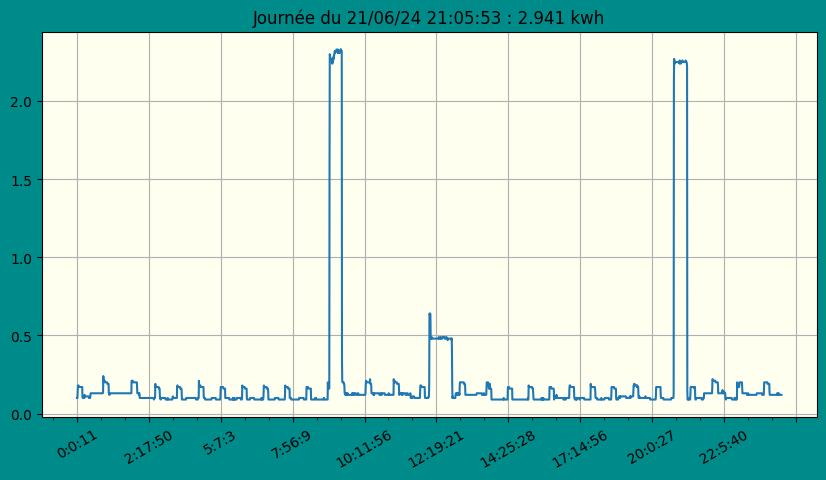

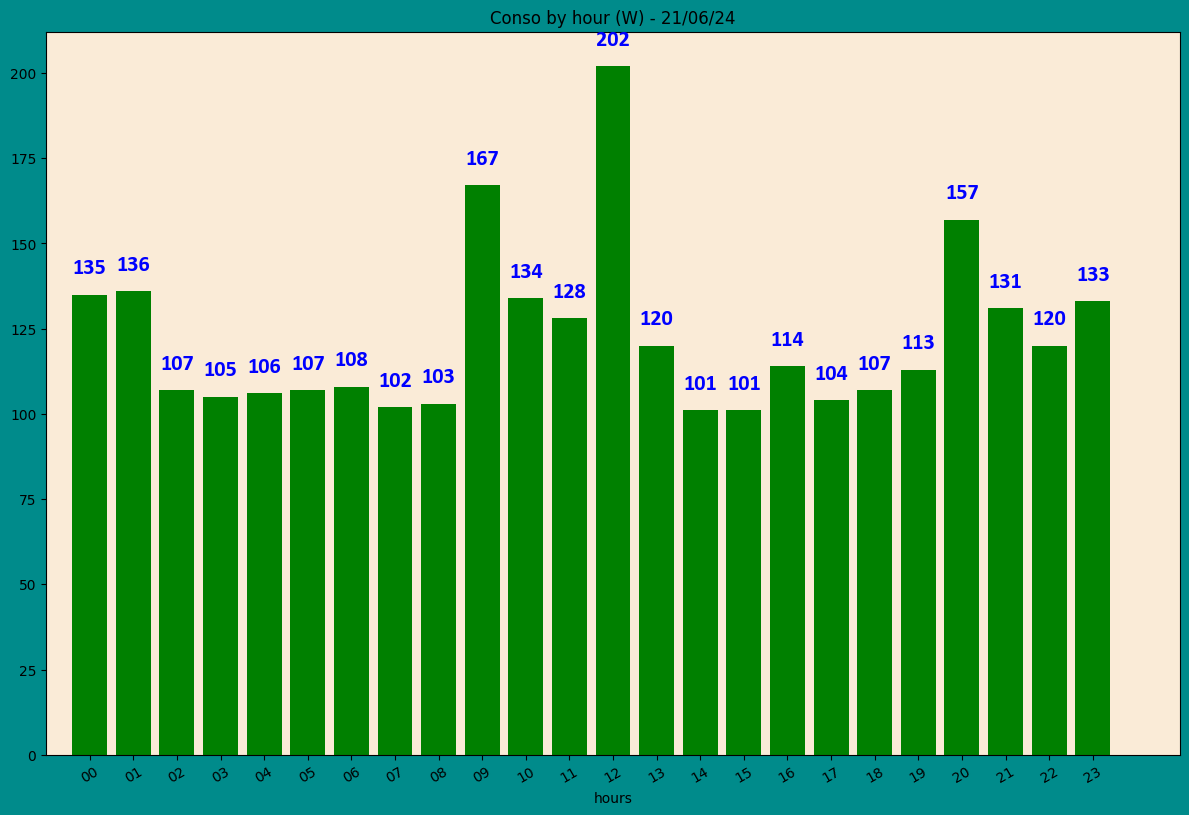

In [67]:
# plot any day
day = '21/06/24'
show(day,pltcolor='darkcyan')
conso_byhour(day)

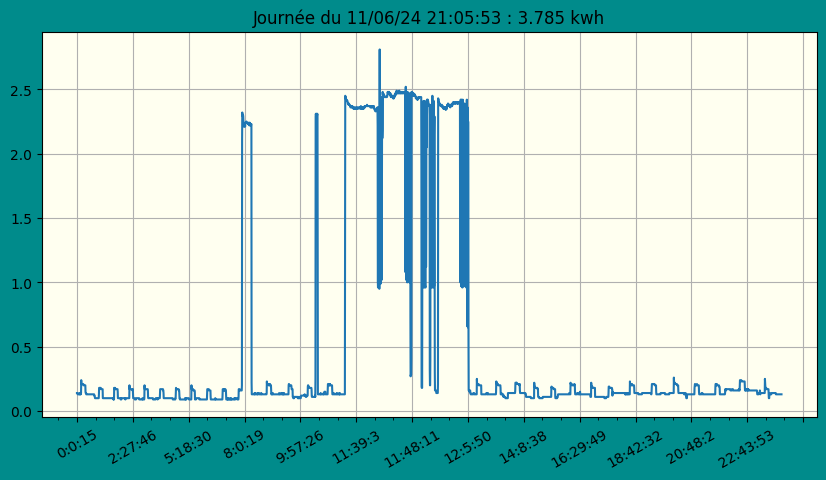

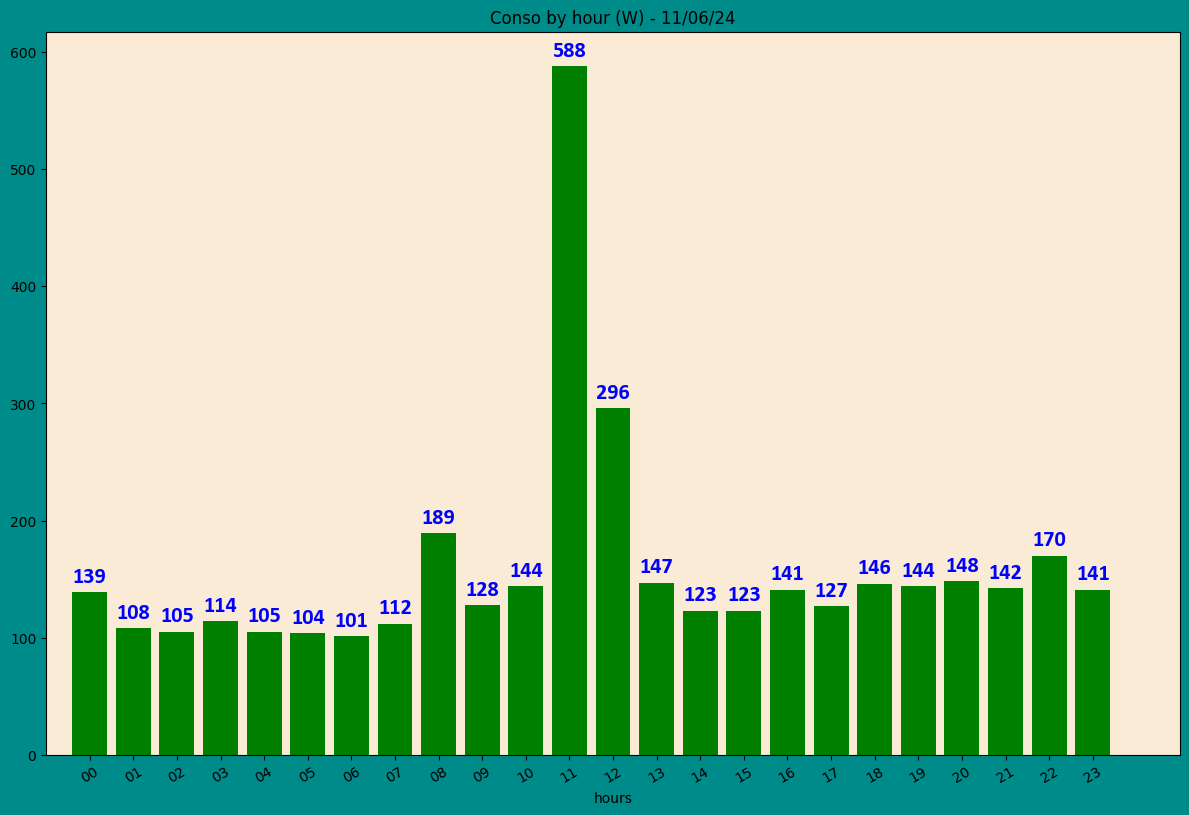

In [68]:
# plot day max conso (télévision de 11h à 23h)
day = month.idxmax()
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [69]:
filename='conso_data.csv'
#conso_data.to_csv(filename)